# My EEG

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import mne
import microstates

matplotlib.use('Qt5Agg')
%matplotlib qt
#%matplotlib inline

size=16

In [2]:
folder = '/Users/giacomobarzon/Desktop/EEG-microstates/'
fname = folder + 'Giac.set'

raw = mne.io.read_raw_eeglab(fname)

<ipython-input-2-6758fa11d771>:4: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab(fname)
<ipython-input-2-6758fa11d771>:4: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname)


In [3]:
# rename bad annotations
raw.annotations.rename({'boundary': 'bad frames'})

# rename eog and ecg channels
mne.rename_channels(raw.info, mapping={'BIP1':'EOG1', 'BIP2':'EOG2', 'BIP4':'ECG'})

# fix channel type of eog and ecg
raw.set_channel_types(mapping={'EOG1':'eog', 'EOG2':'eog', 'ECG':'ecg'})

<RawEEGLAB | Giac.set, 33 x 583241 (1166.5 s), ~146.9 MB, data loaded>

In [4]:
raw.describe()

<RawEEGLAB | Giac.set, 33 x 583241 (1166.5 s), ~146.9 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -413.68      -6.15       0.04       6.35     234.48
 1  Fpz   EEG   µV      -282.82      -6.02       0.07       6.16     203.93
 2  Fp2   EEG   µV      -210.55      -6.06       0.06       6.22     215.64
 3  F7    EEG   µV      -624.27      -5.44      -0.09       5.29     188.69
 4  F3    EEG   µV       -85.09      -6.10      -0.08       5.94     272.90
 5  Fz    EEG   µV      -224.09      -6.18      -0.05       6.07      82.61
 6  F4    EEG   µV      -104.94      -6.08      -0.04       5.94     337.91
 7  F8    EEG   µV      -109.87      -5.41       0.01       5.35     213.98
 8  FC5   EEG   µV       -99.99      -4.55      -0.07       4.47     325.93
 9  FC1   EEG   µV      -107.78      -5.80      -0.11       5.68     354.00
10  FC2   EEG   µV       -67.55      -5.92      -0.07       5.76      68.70
11  FC6   EEG   µ

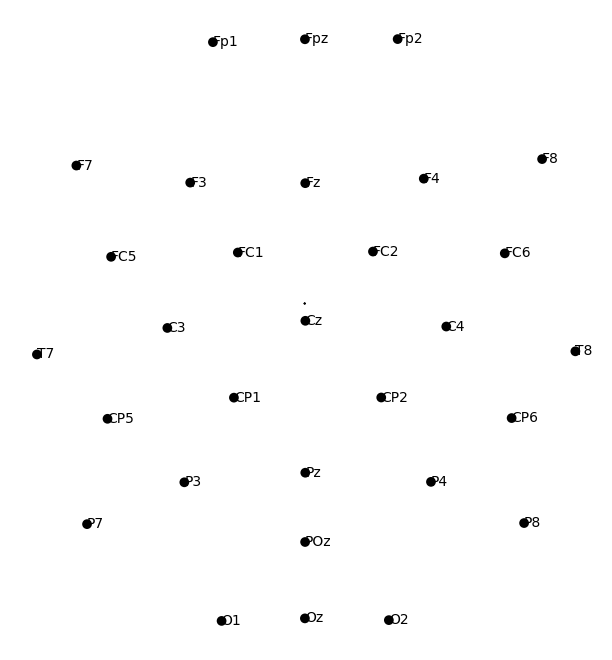

In [7]:
raw.plot_sensors(show_names=True)

In [8]:
# get events list
events, events_id = mne.events_from_annotations(raw)

print('total number of events:', len(events))
print('events id:', events_id)

Used Annotations descriptions: ['s1', 's11', 's2', 's21', 's31']
total number of events: 72
events id: {'s1': 1, 's11': 2, 's2': 3, 's21': 4, 's31': 5}


Using matplotlib as 2D backend.


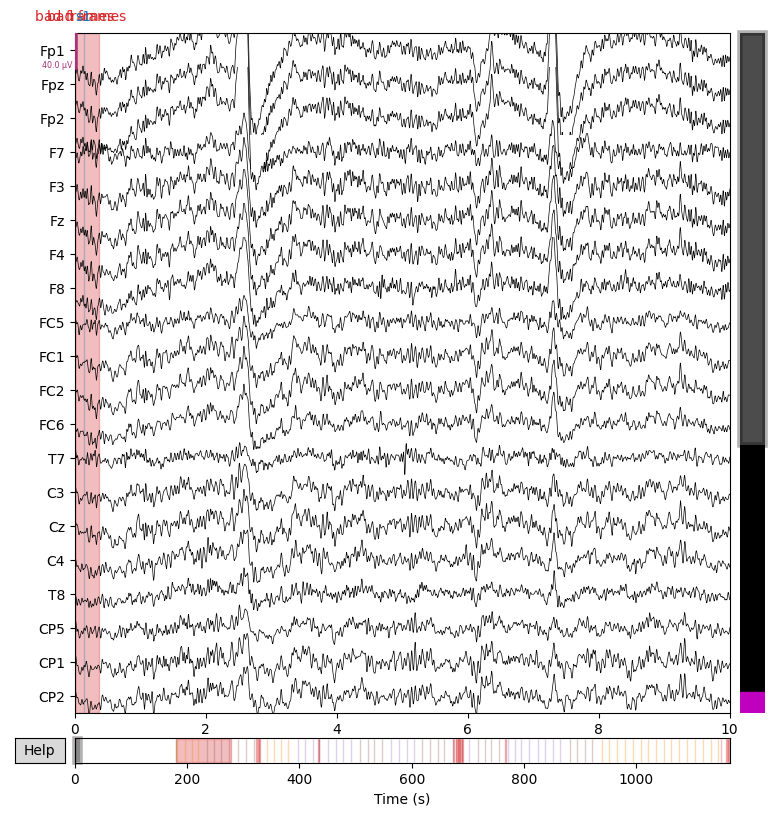

In [9]:
raw.plot()

Setting 59179 of 583241 (10.15%) samples to NaN, retaining 524062 (89.85%) samples.
Effective window size : 4.096 (s)


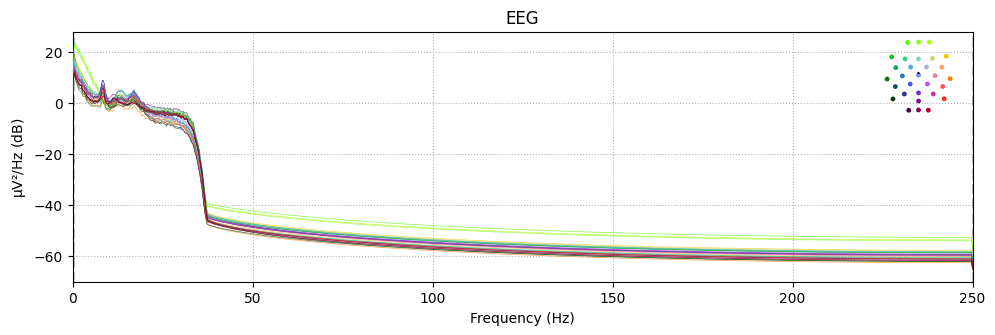

In [10]:
raw.plot_psd()

# Preprocessing

In [ ]:
# Check eog
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

In [ ]:
# Check ecg
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [12]:
# Apply ICA to n_components that desribe up to 99% of the variance
ica = mne.preprocessing.ICA(0.99).fit(raw)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 59179 of 583241 (10.15%) samples, retaining 524062 (89.85%) samples.


<ipython-input-12-5a1f39c488b2>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica = mne.preprocessing.ICA(0.99).fit(raw)


Selecting by explained variance: 13 components
Fitting ICA took 11.0s.


Creating RawArray with float64 data, n_channels=16, n_times=583241
    Range : 0 ... 583240 =      0.000 ...  1166.480 secs
Ready.


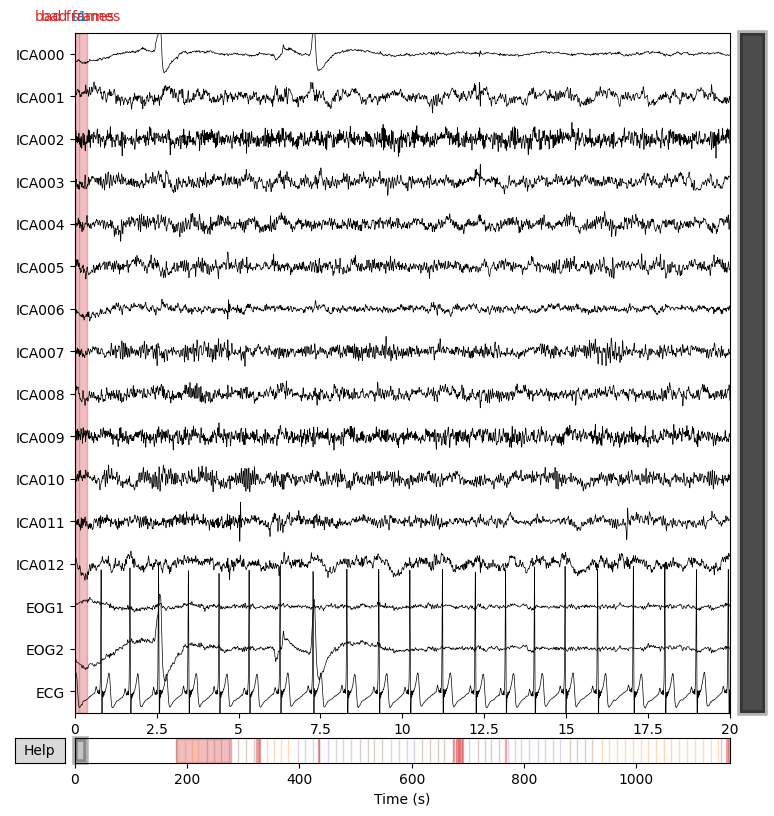

In [13]:
ica.plot_sources(raw, show_scrollbars=True)

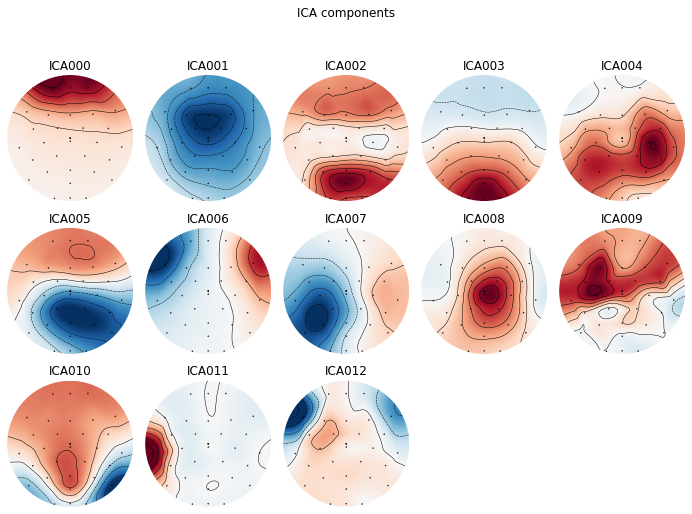

[<MNEFigure size 702x526.68 with 13 Axes>]

In [43]:
ica.plot_components()

In [17]:
bads_eog, eog_scores = ica.find_bads_eog(raw)
bads_ecg, ecg_scores = ica.find_bads_ecg(raw)

Using EOG channels: EOG1, EOG2
Omitting 59179 of 583241 (10.15%) samples, retaining 524062 (89.85%) samples.
Omitting 59179 of 583241 (10.15%) samples, retaining 524062 (89.85%) samples.
Omitting 59179 of 583241 (10.15%) samples, retaining 524062 (89.85%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain des

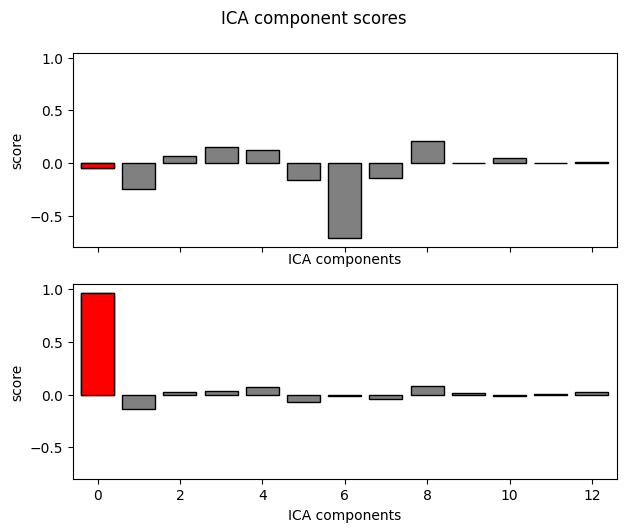

In [19]:
# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

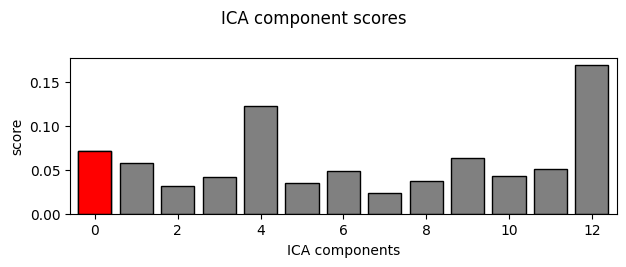

In [20]:
# barplot of ICA component "ECG match" scores
ica.plot_scores(ecg_scores)

In [18]:
ica.exclude = bads_ecg + bads_eog
raw = ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components


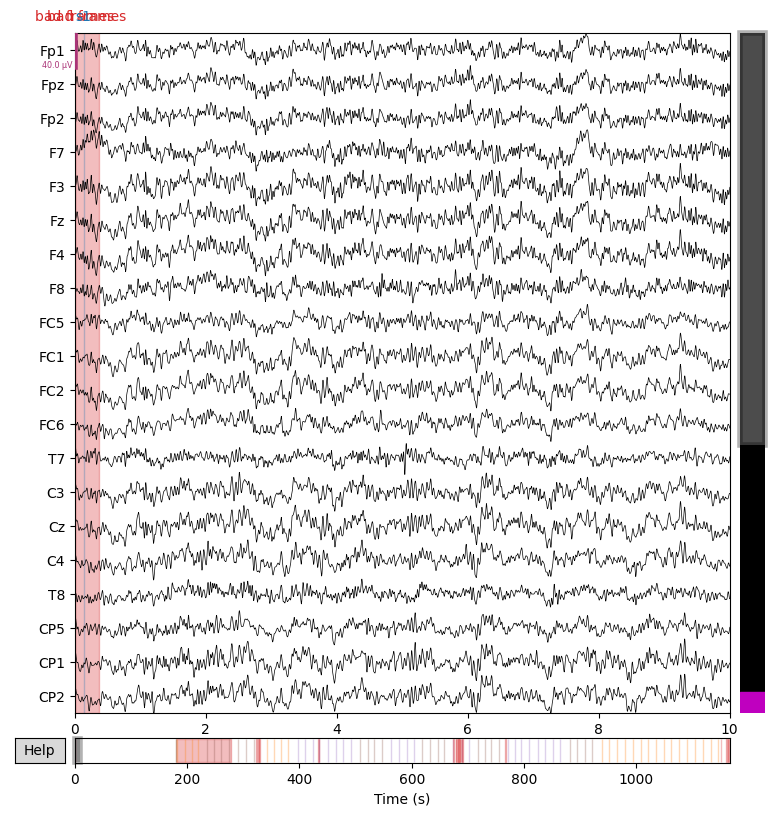

In [21]:
raw.plot()

Setting 59179 of 583241 (10.15%) samples to NaN, retaining 524062 (89.85%) samples.
Effective window size : 4.096 (s)


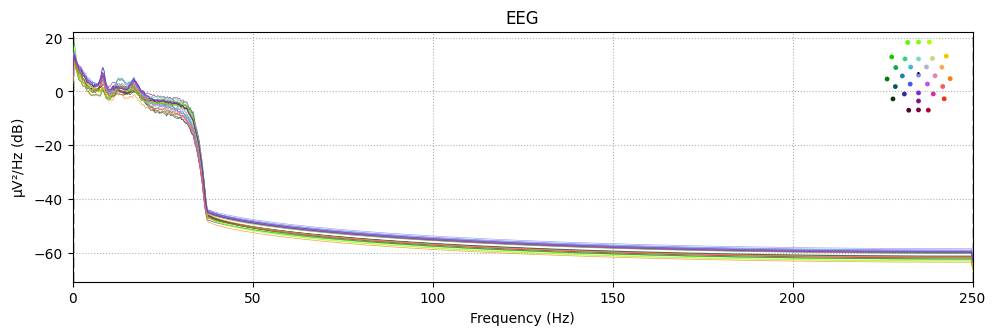

In [22]:
raw.plot_psd()

# Microstates

In [23]:
# get data without bad frames
data, times = raw.get_data(picks='eeg', reject_by_annotation='omit', return_times=True)
data.shape

Omitting 59179 of 583241 (10.15%) samples, retaining 524062 (89.85%) samples.


(30, 524062)

In [24]:
# get only resting state
resting = data[:,:events[1][0]]
resting.shape

(30, 90084)

In [25]:
# Segment the data into microstates
n_states=4
states = np.arange(n_states)
maps, segmentation, polarity = microstates.segment(data, n_states=n_states, max_n_peaks=None, return_polarity=True) #, thresh=1e-20, verbose=True, min_peak_dist=1, n_inits=4)

Finding 4 microstates, using 10 random intitializations
Converged at 41 iterations.
GEV of found microstates: 0.427331
Converged at 80 iterations.
GEV of found microstates: 0.432346
Converged at 75 iterations.
GEV of found microstates: 0.444654
Converged at 68 iterations.
GEV of found microstates: 0.495663
Converged at 120 iterations.
GEV of found microstates: 0.495130
Converged at 40 iterations.
GEV of found microstates: 0.439761
Converged at 39 iterations.
GEV of found microstates: 0.443138
Converged at 51 iterations.
GEV of found microstates: 0.493138
Converged at 75 iterations.
GEV of found microstates: 0.440027
Converged at 72 iterations.
GEV of found microstates: 0.444998


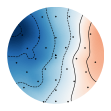

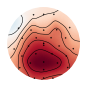

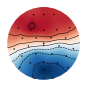

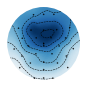

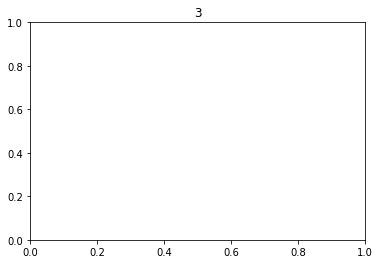

In [44]:
# Plot the topographic maps of the found microstates
microstates.plot_maps(maps, raw.info)

In [27]:
nn = 500
n0 = 1000

microstates.plot_segmentation(segmentation[n0:n0+nn], raw.get_data()[:,n0:n0+nn],
                              raw.times[n0:n0+nn], polarity=polarity[n0:n0+nn])

# Distributions & transition probabilities

In [28]:
def get_segmentation(data, maps):
    activation = maps.dot(data)
    return np.argmax(np.abs(activation), axis=0)

def count_occur(data, states):
    # count microstates occurrence
    #tmp_states, counts = np.unique(segmentation, return_counts=True)
    # also safe if all microstates are present
    idx = np.searchsorted(states,data)
    idx[idx==len(states)] = 0
    mask = states[idx]==data
    counts = np.bincount(idx[mask])
    
    return counts

def count_joint_occur(data, states):
    # Compute joint matrix
    n_states = len(states)
    q_matrix = np.zeros((n_states,n_states))

    for i in range(n_states):
        # init state
        s_in = data[:-1] == states[i]
    
        for j in range(i, n_states):
            # ending state
            s_out = data[1:] == states[j]
            # count occurrences
            q_matrix[i,j] = np.sum(s_in*s_out)
        
    # simmetrize matrix
    q_matrix += q_matrix.T - np.diag(q_matrix.diagonal())
    
    return q_matrix

def get_prob(data, states):
    counts = count_occur(data, states)
    return counts / np.sum(counts)

def get_q_matrix(data, states):
    q_matrix = count_joint_occur(data, states)
    
    return q_matrix / q_matrix.sum()

def get_t_matrix(data, states):
    t_matrix = count_joint_occur(data, states)
    # normalize each row
    t_matrix = t_matrix / t_matrix.sum(axis=1)[:,None]
    
    return t_matrix

def plot_distributions(prob, t_matrix):
    plt.figure(figsize=(16,4))

    # probability distribution
    plt.subplot(1,2,1)

    plt.bar(states.astype(str), prob)

    plt.xlabel('state', size=size)
    plt.ylabel('prob', size=size)

    # transition matrix
    plt.subplot(1,2,2)

    plt.imshow(t_matrix, extent=[0,n_states,0,n_states], cmap='summer')

    for i in range(n_states):
        for j in range(n_states):
            plt.text(j+0.2, n_states-1-i+0.4, '{:0.3f}'.format(t_matrix[i,j]))

    plt.xticks(states+0.5, labels=states)
    plt.yticks(states+0.5, labels=states[::-1])

    plt.xlabel('state t+1', size=size)
    plt.ylabel('state t', size=size)
    plt.colorbar()

    plt.show()

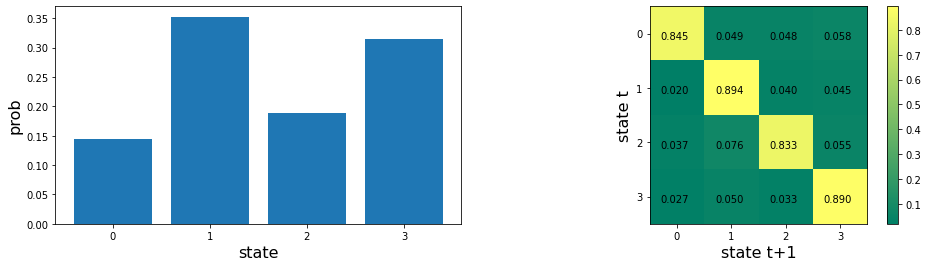

In [45]:
prob = get_prob(segmentation, states)
q_matrix = get_q_matrix(segmentation, states)
t_matrix = get_t_matrix(segmentation, states)

plot_distributions(prob, t_matrix)

In [30]:
# Get epoched data
epochs = mne.Epochs(raw, events, tmin=0, tmax=6, baseline=None, event_id=events_id)

Not setting metadata
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated


In [31]:
epochs

Number of events,72
Events,s1: 1s11: 24s2: 1s21: 23s31: 23
Time range,0.000 – 6.000 sec
Baseline,off


In [32]:
epochs.drop_bad()

Loading data for 72 events and 3001 original time points ...
15 bad epochs dropped


Number of events,57
Events,s1: 0s11: 19s2: 0s21: 20s31: 18
Time range,0.000 – 6.000 sec
Baseline,off


In [34]:
tasks = ['s11', 's21', 's31']
n_tasks = len(tasks)

q_matrix_task = np.zeros((n_tasks, n_states, n_states))
t_matrix_task = np.zeros((n_tasks, n_states, n_states))
prob_task = np.zeros((n_tasks, n_states))

## loop over tasks
for i, task in enumerate(tasks):
    # get epochs
    task_data = epochs[task].get_data(picks='eeg')
    
    ## loop over trials
    for trial in task_data:
        # get segmentation
        segmented = get_segmentation(trial, maps)
        
        ## count occurrences for probability
        prob_task[i] += count_occur(segmented, states)
        
        ## count occurrences for transition matrix
        q_matrix_task[i] += count_joint_occur(segmented, states)
    
    ## normalize
    prob_task[i] = prob_task[i] / np.sum(prob_task[i])
    t_matrix_task[i] = q_matrix_task[i] / q_matrix_task[i].sum(axis=1)[:,None]

Loading data for 19 events and 3001 original time points ...
Loading data for 20 events and 3001 original time points ...
Loading data for 18 events and 3001 original time points ...


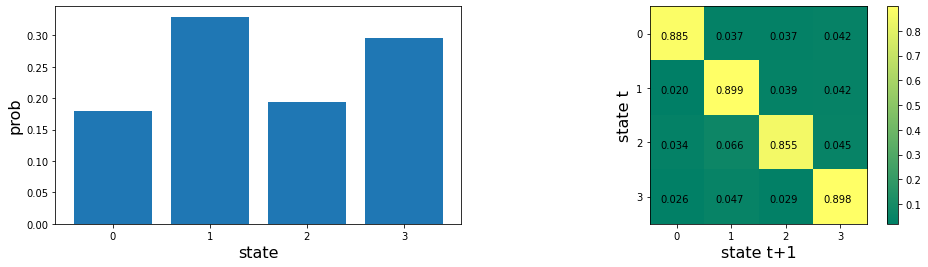

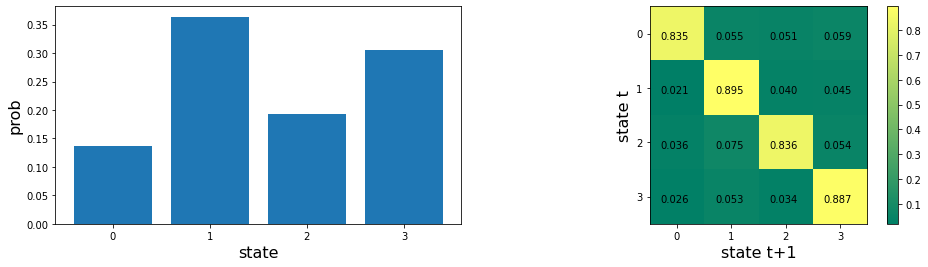

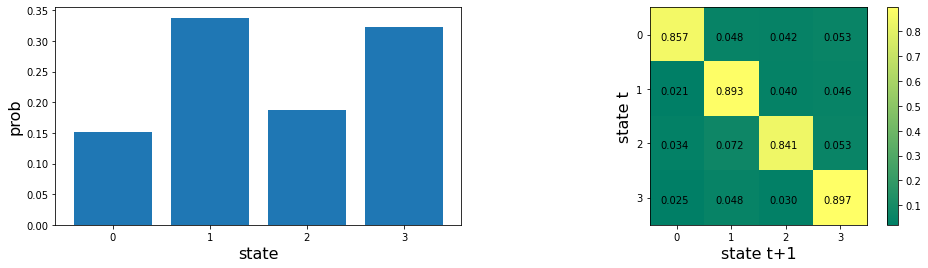

In [46]:
for i, task in enumerate(tasks):
    plot_distributions(prob_task[i], t_matrix_task[i])

In [35]:
## distributions at resting
# get segmentation
resting_states = get_segmentation(resting, maps)
p_rest = get_prob(resting_states, states)
q_rest = get_q_matrix(resting_states, states)
t_rest = get_t_matrix(resting_states, states)

# Transition cost

In [ ]:
# start matlab engine
import matlab.engine

eng = matlab.engine.start_matlab()
eng.addpath('SB_toolbox-main')

In [37]:
# convert empirical distributions to Matlab arrays
ini_dist = matlab.double(p_rest.reshape(-1,1).tolist())
Q = matlab.double(q_rest.tolist())

Ps = []

for i, task in enumerate(tasks):

    tar_dist = matlab.double(prob_task[i].reshape(-1,1).tolist())
    
    P =  eng.solveSBP(ini_dist,tar_dist,Q)
    Ps.append(P)

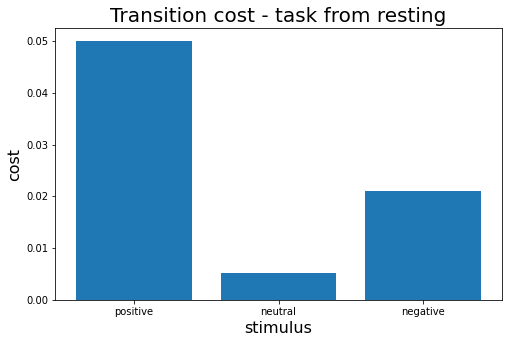

In [51]:
plt.figure(figsize=(8,5))

plt.bar(['positive', 'neutral', 'negative'], Ps)

plt.ylabel('cost', size=size)
plt.xlabel('stimulus', size=size)
plt.title('Transition cost - task from resting', size=size+4)

plt.show()